In [1]:
from skimage.io import imread
from sklearn.externals import joblib
import numpy as np
import os
import matplotlib.pyplot as plt
from acf import *


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
clf = joblib.load("adaboost.v2.2.pkl")
test_dir = os.path.join("E:/", "data", "INRIAPerson", "Train", "pos")
file_list = os.listdir(test_dir)

D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(602, 835, 3)


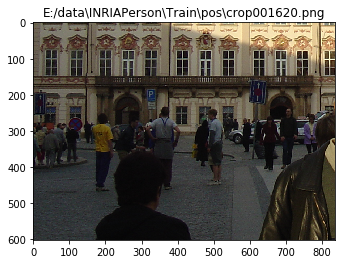

In [9]:
file = os.path.join(test_dir, file_list[np.random.randint(0, len(file_list)-1)])
img = imread(file)
img = img[...,:3]
print(img.shape)
plt.title(file)
plt.imshow(img)

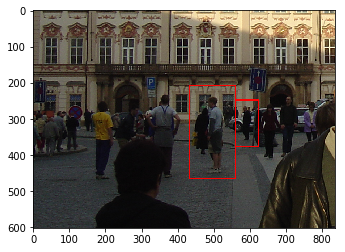

In [10]:
bbox_list, prob_list = detect(img, clf)
rects = filter_bbox(bbox_list, prob_list, prob_threshold=0, nms_threshold=0.3)
img_box = draw_bbox(img, rects)
plt.imshow(img)

## Random plot

In [5]:
# np.random.seed(2018)
file_choose = np.random.choice(file_list, 10)

10it [05:50, 35.02s/it]


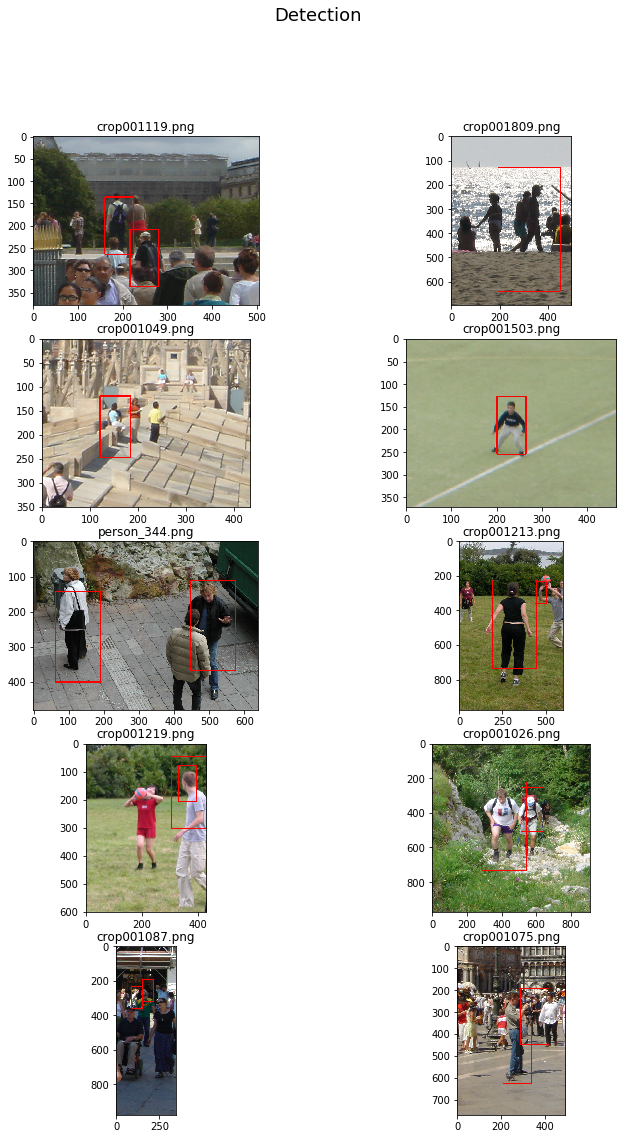

In [6]:
plt.figure(figsize=(12, 18))
plt.suptitle('Detection', fontsize=18)
for i, file_name in tqdm(enumerate(file_choose)):
    file = os.path.join(test_dir, file_name)
    img = imread(file)
    img = img[...,:3]
    bbox_list, prob_list = detect(img, clf)
    rects = filter_bbox(bbox_list, prob_list, prob_threshold=0, nms_threshold=0.3)
    img_box = draw_bbox(img, rects)
    plt.subplot(5, 2, i+1)
    plt.title(file_name)
    plt.imshow(img_box)
    
plt.show()

## Evaluation

In [11]:
from skimage.io import imsave

In [12]:
anno_dir = "E:/data/INRIAPerson/Test/annotations"
test_path = "E:/data/INRIAPerson/Test/pos"
iou_threshold = 0.5
nms_threshold = 0.3
predict_threshold = 0

file_list = os.listdir(anno_dir)
total_detect_num = 0
total_true_num = 0
true_positive = 0
for file in tqdm(file_list):
    true_bboxex = read_annotation(anno_dir + os.sep + file)
    img_file = test_path + os.sep + file[:-3] + "png"
    img = imread(img_file)
    img = img[...,:3]
    bbox_list, prob_list = detect(img, clf)
    rects = filter_bbox(bbox_list, prob_list, prob_threshold=predict_threshold, nms_threshold=nms_threshold)
    
    img_box = draw_bbox(img, rects)
    imsave("out//" + file[:-3] + "jpg", img_box)
    
    total_detect_num += len(rects)
    total_true_num += len(true_bboxex)
    for box1 in rects:
        for box2 in true_bboxex:
            if calc_iou(box1, box2) >= iou_threshold:
                true_positive += 1
                
print('precision: ', true_positive/total_detect_num)
print('recall: ', true_positive/total_true_num)

  9%|███████▏                                                                       | 26/288 [35:05<5:53:40, 80.99s/it]

KeyboardInterrupt: 